* Make cqt image and do image classification
* use other audio classification?
* just send Y through nn?


1. Make cqt images for each artist
    * pick type of cqt (cqt, icqt ,psudo_cqt, vqt... )
    * 5 second splits
    * clean up somehow - drop low values, normalize?
2. Save to folder for each artist
3. nn 

In [2]:
import numpy as np
import pandas as pd
import math
import librosa
import glob

import IPython.display as ipd



from PIL import Image



import matplotlib.pyplot as plt


In [3]:
N_BINS = 84
HOP_LENGTH = 512

In [120]:
y, sr = librosa.load('test_audio/Moravec - Bach Chromatic Fantasia BVW 903.mp3', duration=10)

In [121]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz("C1"), n_bins=N_BINS, hop_length=HOP_LENGTH))

D = np.abs(librosa.iirt(y))

E = np.abs(librosa.stft(y))

F = np.abs(librosa.hybrid_cqt(y))

G = np.abs(librosa.pseudo_cqt(y))



In [122]:
C.shape, D.shape, E.shape, F.shape, G.shape

((84, 431), (85, 431), (1025, 431), (84, 431), (84, 431))

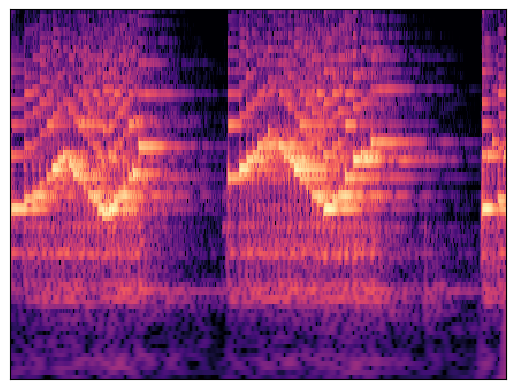

In [123]:
fig, ax = plt.subplots()

librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, ax=ax)


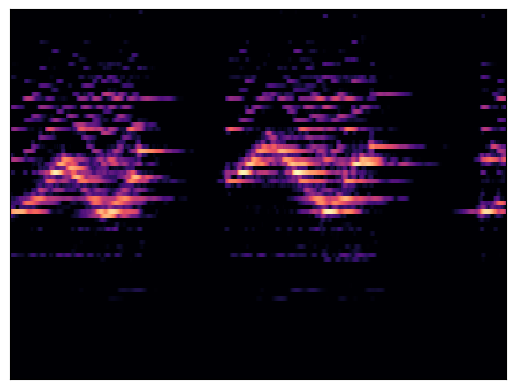

In [124]:
fig, ax = plt.subplots()

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                               sr=sr, ax=ax)


# Make IRT images

In [12]:
audio_files = glob.glob("test_audio/**/*.mp3", recursive=True)
SECONDS_PER_SAMPLE =5

In [14]:
audio_files

['test_audio/Nikolayeva - Shostakovich  P and F B2.mp3',
 'test_audio/Pogorelich - Chopin 4 scherzi.mp3',
 'test_audio/Moravec - Bach Chromatic Fantasia BVW 903.mp3',
 'test_audio/Crochet - Goldberg Variation.mp3',
 'test_audio/Gould - Goldberg Variations, Aria.mp3',
 'test_audio/Rubinstein - Chopin Nocturne Op. 48 in C Minor.mp3']

In [16]:
for file in audio_files:
    
    y, sr = librosa.load(file)

    artist = file.split("/")[1].split()[0]

    print(f"Processing {artist}")

    n = 0

    for i in range(0, len(y), sr * SECONDS_PER_SAMPLE):

        
        y_sample = y[i:i + sr * SECONDS_PER_SAMPLE]

        
        # drop non-full samples

        if len(y_sample) == sr * SECONDS_PER_SAMPLE:

            D = np.abs(librosa.iirt(y_sample))

            save_path = f'test_images/{artist}/{n}.png'

            n += 1

            img = Image.fromarray(D, 'L')


            img.save(save_path)

        if n % 100 == 0:

            print(f"Saved {n} images")

        


Processing Nikolayeva
Saved 100 images
Saved 200 images
Saved 300 images
Saved 400 images
Saved 500 images
Saved 600 images
Saved 700 images
Saved 800 images
Saved 900 images
Saved 1000 images
Processing Pogorelich
Saved 100 images
Saved 200 images
Saved 300 images
Saved 400 images
Processing Moravec
Processing Crochet
Saved 100 images
Saved 200 images
Saved 300 images
Saved 400 images
Saved 500 images
Saved 600 images
Saved 700 images
Saved 800 images
Saved 900 images
Processing Gould
Processing Rubinstein
